In [2]:
import nltk
import collections
import unicodedata 
import matplotlib.pyplot as plt

import re
import inflect 
#This is a simple library for accomplishing 
#the natural language related tasks of generating plurals, 
#singular nouns, ordinals, and indefinite articles, and 
#(of most interest to us) converting numbers to words 

from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.util import ngrams

import time

In [3]:
file = open("../corpus/bible.txt").read()

In [4]:
start = time.time()
pre_tokens = sent_tokenize(file)
post_token = []

# now loop over each sentence and tokenize it separately
for sentence in pre_tokens:
    post_token.append(word_tokenize(sentence))

end = time.time()
print(end-start)

4.460659027099609


In [5]:
print(len(post_token))

29743


In [6]:
#normalise tokens manually
'''
removing non ascii
to lowercase
remove punctuation
replace numbers
remove stopwords
'''

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    #words = remove_stopwords(words)
    return words

start = time.time()
data = []

for x in range(len(post_token)):
    data.append(normalize(post_token[x]))

end = time.time()

print(end-start)

1.1853995323181152


In [7]:
print(data[:3])

[['in', 'the', 'beginning', 'god', 'created', 'the', 'heaven', 'and', 'the', 'earth'], ['and', 'the', 'earth', 'was', 'without', 'form', 'and', 'void', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the', 'deep'], ['and', 'the', 'spirit', 'of', 'god', 'moved', 'upon', 'the', 'face', 'of', 'the', 'waters']]


# outdated: applicable if data is tokenized entirely, not per sentence


In [140]:
bigrams = ngrams(data,2)

biF=nltk.ConditionalFreqDist(bigrams)

biF.conditions()
biF.keys()
print(biF['my'].most_common(10))

biP = nltk.ConditionalProbDist(biF , nltk.MLEProbDist)
print(biP['my'].prob('people')) #prob for people given previous word is my

TypeError: unhashable type: 'list'

In [141]:
trigrams = ngrams(data,3)

triF = nltk.FreqDist(trigrams)

triF.plot(10)

TypeError: unhashable type: 'list'

In [ ]:
print(triF.freq(('of','the','lord'))) #relative frequency estimate

smoothing is required for values where answer above is equal to zero

In [ ]:
print(triF.N()) #total trigrams in training set

# NLTK LM intro, important to note that lm required data to be tokenized per sentence
3 main steps: Building vocab, training(counting ngrams), output prob

In [ ]:
#tips
>>> import nltk
>>> obs = 'the rain in spain falls mainly in the plains'.split()
>>> lm = nltk.NgramModel(2, obs, estimator=nltk.MLEProbDist)
>>> lm.prob('rain', 'the') #wrong
0.0
>>> lm.prob('rain', ['the']) #right
0.5
>>> lm.prob('spain', 'rain in') #wrong
0.0
>>> lm.prob('spain', ['rain in']) #wrong
'''long exception'''
>>> lm.prob('spain', ['rain', 'in']) #right
1.0

In [12]:
from nltk import lm
help(lm)

Help on package nltk.lm in nltk:

NAME
    nltk.lm

DESCRIPTION
    NLTK Language Modeling Module.
    ------------------------------
    
    Currently this module covers only ngram language models, but it should be easy
    to extend to neural models.
    
    
    Preparing Data
    
    Before we train our ngram models it is necessary to make sure the data we put in
    them is in the right format.
    Let's say we have a text that is a list of sentences, where each sentence is
    a list of strings. For simplicity we just consider a text consisting of
    characters instead of words.
    
        >>> text = [['a', 'b', 'c'], ['a', 'c', 'd', 'c', 'e', 'f']]
    
    If we want to train a bigram model, we need to turn this text into bigrams.
    Here's what the first sentence of our text would look like if we use a function
    from NLTK for this.
    
        >>> from nltk.util import bigrams
        >>> list(bigrams(text[0]))
        [('a', 'b'), ('b', 'c')]
    
    Notice how "b

In [14]:
#from nltk.model import build_vocabulary <----- outdated, package replaced

text = [['a', 'b', 'c'], ['a', 'c', 'd', 'c', 'e', 'f']]
print(text[:1])
print(list(ngrams(text[0],2)))

[['a', 'b', 'c']]
[('a', 'b'), ('b', 'c')]


In [15]:
from nltk.lm.preprocessing import padded_everygram_pipeline
#building vocab
train, vocab = padded_everygram_pipeline(2, text)

In [16]:
from nltk.lm import MLE
#training
lm = MLE(2) #highest ngram in paramater. Instantiation creates empty vocab
lm.fit(train, vocab)
print(lm.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 9 items>


In [17]:
#using model
print(lm.counts)

#counting unigrams with a and displaying its score
print(lm.counts['a'])
print(lm.score('a'))
print(lm.logscore('a'))
#counting bigrams with a b
print(lm.counts[['a']]['b'])

#chance for b given previous word was a
print(lm.score('b', ['a']))
#or using log domain
print(lm.logscore('b',['a']))



<NgramCounter with 2 ngram orders and 24 ngrams>
2
0.15384615384615385
-2.700439718141092
1
0.5
-1.0


## This being MLE, the model returns the item’s relative frequency as its score.

In [ ]:
#perplexity and entropy
>>> test = [('a', 'b'), ('c', 'd')]
>>> lm.entropy(test)
1.292481250360578
>>> lm.perplexity(test)
2.449489742783178

In [18]:
#generating random sentences
lm.generate(8, random_seed=9)

['b', 'c', '</s>', 'e', 'f', '</s>', 'e', 'f']

# apply this on larger corpus still bigrams do

In [19]:
from nltk import lm
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE

In [40]:
tempData = [['awe','hierdie','is','my','toets','data'],['ek','hoop','dit', 'werk'],['as','dit','nie','werk','nie'],['is','ek','fucked'],['so','kom','ons','hoop','vir','die','beste']]

In [48]:
tempData.append(['hos','kom','ons','kyk'])
print(tempData)

[['awe', 'hierdie', 'is', 'my', 'toets', 'data'], ['ek', 'hoop', 'dit', 'werk'], ['as', 'dit', 'nie', 'werk', 'nie'], ['is', 'ek', 'fucked'], ['so', 'kom', 'ons', 'hoop', 'vir', 'die', 'beste'], ['hos', 'kom', 'ons', 'kyk']]


In [94]:
print(pre_tokens[:3])

['In the beginning God created the heaven and the earth.', 'And the earth was without form, and void; and darkness was upon the face of the deep.', 'And the Spirit of God moved upon the face of the waters.']


In [95]:
print(post_token[:3])

[['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.'], ['And', 'the', 'earth', 'was', 'without', 'form', ',', 'and', 'void', ';', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the', 'deep', '.'], ['And', 'the', 'Spirit', 'of', 'God', 'moved', 'upon', 'the', 'face', 'of', 'the', 'waters', '.']]


In [143]:
print(data[:3])

[['in', 'the', 'beginning', 'god', 'created', 'the', 'heaven', 'and', 'the', 'earth'], ['and', 'the', 'earth', 'was', 'without', 'form', 'and', 'void', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the', 'deep'], ['and', 'the', 'spirit', 'of', 'god', 'moved', 'upon', 'the', 'face', 'of', 'the', 'waters']]


In [136]:
print(list(ngrams(data[0],2)))

[('in', 'the'), ('the', 'beginning'), ('beginning', 'god'), ('god', 'created'), ('created', 'the'), ('the', 'heaven'), ('heaven', 'and'), ('and', 'the'), ('the', 'earth')]


In [20]:
train2, vocab2 = padded_everygram_pipeline(2,data)

In [21]:
#training
start = time.time()
lm2 = MLE(2) #highest ngram in paramater. Instantiation creates empty vocab
lm2.fit(train2, vocab2)
end = time.time()

print(end-start)

7.936531066894531


In [22]:
lm2.generate(10, random_seed=3)

['children',
 'of',
 'juda',
 'were',
 'of',
 'babylon',
 '</s>',
 'then',
 'he',
 'had']

In [23]:
print(lm2.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 12564 items>


# lets try trigrams

In [24]:
train3, vocab3 = padded_everygram_pipeline(3,data)

In [25]:
#training
start = time.time()
lm3 = MLE(3) #highest ngram in paramater. Instantiation creates empty vocab
lm3.fit(train3, vocab3)
end = time.time()

print(end-start)

15.3253014087677


In [26]:
lm3.generate(10, random_seed=2)

['where', 'we', 'abode', 'in', 'the', 'second', 'time', 'and', 'that', 'they']

In [27]:
print(lm3.vocab)
print(lm3.counts)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 12564 items>
<NgramCounter with 3 ngram orders and 2642466 ngrams>


# finding distributions, however recalculates ngrams


In [28]:
from nltk.util import everygrams
from nltk.lm import NgramCounter

2.342249870300293


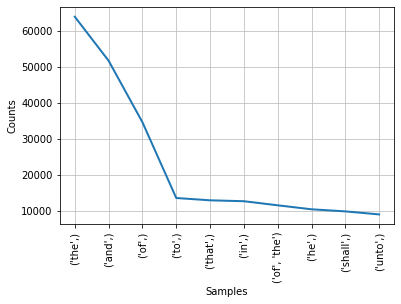

In [29]:
start = time.time()
tempdata = [item for sublist in data for item in sublist] #flatten list
all_ngrams = everygrams(tempdata,max_len=3)
fd = nltk.FreqDist(all_ngrams)
end = time.time()

print(end-start)
fd.plot(10)

In [30]:
start = time.time()

text_bigrams = [ngrams(sent, 2) for sent in data]
text_unigrams = [ngrams(sent, 1) for sent in data]
text_trigrams = [ngrams(sent,3) for sent in data]

ngram_counts = NgramCounter(text_bigrams + text_unigrams + text_trigrams)
end = time.time()

print(end-start)

4.240858793258667


In [31]:
start = time.time()
print(ngram_counts)
end = time.time()
print(end-start)

<NgramCounter with 3 ngram orders and 2285676 ngrams>
0.06503057479858398


In [ ]:
for ngram in 
ConFD = ConditionalFreqDist()

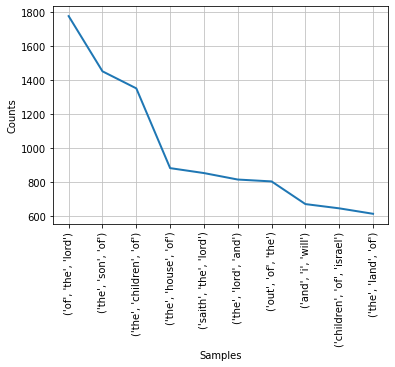

In [43]:
trigramDist = nltk.FreqDist(ngrams(tempdata,3))
trigramDist.plot(10)

In [112]:
print(trigramDist.r_Nr()[1]) #number of elemtents that apperar n times

329932


In [62]:
print(trigramDist.freq(('of','the','lord'))*trigramDist.N())

1774.9999999999998


In [64]:
print(trigramDist.r_Nr()[1775]) 

1


In [67]:
print(len(trigramDist.hapaxes())) #hapaxes() return number of times an ngrams appears once

329932


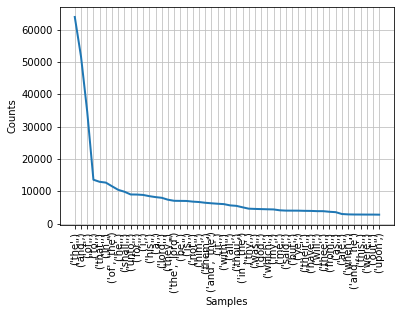

In [70]:
fd.plot(50)

# Good turing intro

For unseen ngrams:
$$ C_0\cdot q_0 = \frac{C_1}{N_\sum} $$

where $ C_0\cdot q_0 $ is the probability of occurence of any unseen n-gram. $C_1$ is the number of n-grams occuring one time in training set

In [83]:
from nltk.probability import SimpleGoodTuringProbDist as GT
smoothedFD = GT(fd)

In [92]:
smoothedFD.max()

('the',)

In [97]:
smoothedFD.smoothedNr(1) #return samples that appear n times

180637.69184230312

In [106]:
print(fd.freq(('unto','them')))
print(smoothedFD.prob(('unto','them')))

print(fd.freq(('lol')))  #prob of ngram
print(smoothedFD.prob(('lol')))#smoothed prob of ngram

0.00040677520743009026
0.00040545353472227374
0.0
0.1806317732704053


In [113]:
print(smoothedFD.max())
print(smoothedFD.prob(('the',)))

('the',)
0.026858200054607803


In [116]:
print(fd.r_Nr()[1]/fd.N()) #prob of unseen ngram according to good turing

0.1806317732704053
